In [1]:
#Is this code efficient? No. 
#Should you run this on a computer with less than 16GB of RAM? No.

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as plt
import geopandas

In [3]:
#Using Citi Bike data from 2019 (pre-covid)
#These files are gigantic
#Run this and go grab a coffee

jan = pd.read_csv("./citibikedata/201901-citibike-tripdata.csv")
feb = pd.read_csv("./citibikedata/201902-citibike-tripdata.csv")
mar = pd.read_csv("./citibikedata/201903-citibike-tripdata.csv")
apr = pd.read_csv("./citibikedata/201904-citibike-tripdata.csv")
may = pd.read_csv("./citibikedata/201905-citibike-tripdata.csv")
jun = pd.read_csv("./citibikedata/201906-citibike-tripdata.csv")
jul = pd.read_csv("./citibikedata/201907-citibike-tripdata.csv")
aug = pd.read_csv("./citibikedata/201908-citibike-tripdata.csv")
sep = pd.read_csv("./citibikedata/201909-citibike-tripdata.csv")
octb = pd.read_csv("./citibikedata/201910-citibike-tripdata.csv")
nov = pd.read_csv("./citibikedata/201911-citibike-tripdata.csv")
dec = pd.read_csv("./citibikedata/201912-citibike-tripdata.csv")
jan18 = pd.read_csv("./citibikedata/201801-citibike-tripdata.csv")
feb18 = pd.read_csv("./citibikedata/201802-citibike-tripdata.csv")
mar18 = pd.read_csv("./citibikedata/201803-citibike-tripdata.csv")
apr18 = pd.read_csv("./citibikedata/201804-citibike-tripdata.csv")
may18 = pd.read_csv("./citibikedata/201805-citibike-tripdata.csv")
jun18 = pd.read_csv("./citibikedata/201806-citibike-tripdata.csv")
jul18 = pd.read_csv("./citibikedata/201807-citibike-tripdata.csv")
aug18 = pd.read_csv("./citibikedata/201808-citibike-tripdata.csv")
sep18 = pd.read_csv("./citibikedata/201809-citibike-tripdata.csv")
octb18 = pd.read_csv("./citibikedata/201810-citibike-tripdata.csv")
nov18 = pd.read_csv("./citibikedata/201811-citibike-tripdata.csv")
dec18 = pd.read_csv("./citibikedata/201812-citibike-tripdata.csv")

#Combining 12 months of data into one dataframe
months = [jan18, feb18, mar18, apr18, may18, jun18, jul18, aug18, sep18, octb18, nov18, dec18, jan, feb, mar, apr, may, jun, jul, aug, sep, octb, nov, dec]

cb = pd.concat(months)
cb.reset_index(inplace=True, drop=True)
cb["starttime"] = pd.to_datetime(cb["starttime"])
cb["stoptime"] = pd.to_datetime(cb["stoptime"])
cb = cb.dropna()


In [7]:
#Using geopandas to convert all start stations to points, adds a "geometry" column to the end of the dataframe
gdf = geopandas.GeoDataFrame(cb, geometry = geopandas.points_from_xy(cb["start station longitude"], cb["start station latitude"]))

In [8]:
gdf = gdf.set_crs("EPSG:4326")
gdf = gdf.to_crs("EPSG:4326")
gdf


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,geometry
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,W 52 St & 11 Ave,40.767272,-73.993929,505.0,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,POINT (-73.99393 40.76727)
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3255.0,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,POINT (-73.99393 40.76727)
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,W 52 St & 11 Ave,40.767272,-73.993929,525.0,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,POINT (-73.99393 40.76727)
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,W 52 St & 11 Ave,40.767272,-73.993929,447.0,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,POINT (-73.99393 40.76727)
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,POINT (-73.99393 40.76727)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38100031,93,2019-12-31 23:58:18.016,2019-12-31 23:59:51.636,3141.0,1 Ave & E 68 St,40.765005,-73.958185,3142.0,1 Ave & E 62 St,40.761227,-73.960940,28734,Subscriber,1985,2,POINT (-73.95818 40.76501)
38100032,786,2019-12-31 23:58:59.896,2020-01-01 00:12:06.346,490.0,8 Ave & W 33 St,40.751551,-73.993934,513.0,W 56 St & 10 Ave,40.768254,-73.988639,41418,Subscriber,1991,1,POINT (-73.99393 40.75155)
38100033,351,2019-12-31 23:59:03.695,2020-01-01 00:04:54.873,3349.0,Grand Army Plaza & Plaza St West,40.672968,-73.970880,3368.0,5 Ave & 3 St,40.672815,-73.983524,27746,Subscriber,1935,2,POINT (-73.97088 40.67297)
38100034,1571,2019-12-31 23:59:21.361,2020-01-01 00:25:32.942,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,366.0,Clinton Ave & Myrtle Ave,40.693261,-73.968896,28506,Subscriber,1980,1,POINT (-73.99852 40.73226)


<AxesSubplot:>

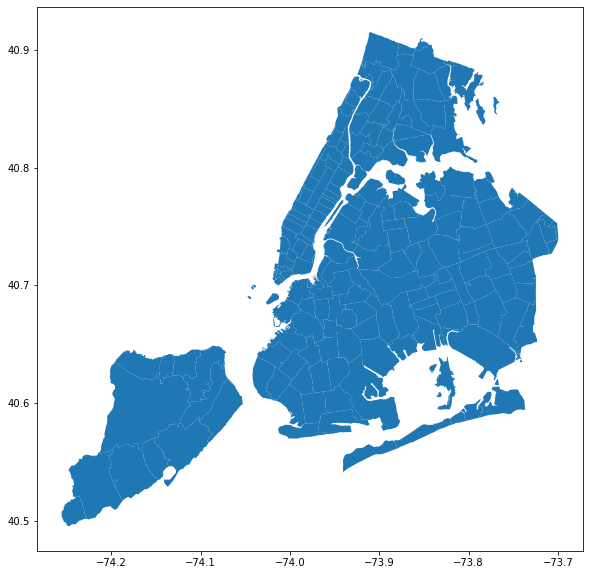

In [9]:
#Loads in a zipcode map from NYC open data, and converts from Mercator to Long/Lat (to match the Citi Bike data)
#We could have also converted all Citi Bike data into Mercator, but it has 7 million rows
zipcodes = geopandas.GeoDataFrame.from_file("./zipcodes")
zipcodes = zipcodes.to_crs("EPSG:4326")

#Plots map (it's pretty!)
zipcodes.plot(figsize = (20,10))


In [11]:
#Creates a dataframe of each individual station and its coordinates in lon/lat
stationsList = gdf.drop_duplicates("start station id")
stationsList = stationsList[["start station id", "start station latitude", "start station longitude", "start station name", "geometry"]]
stationsList.reset_index(inplace = True, drop = True)



In [18]:
stationsList.loc[87]

start station id                                            315.0
start station latitude                                  40.703554
start station longitude                                -74.006702
start station name                       South St & Gouverneur Ln
geometry                   POINT (-74.00670227000001 40.70355377)
Name: 87, dtype: object

<AxesSubplot:>

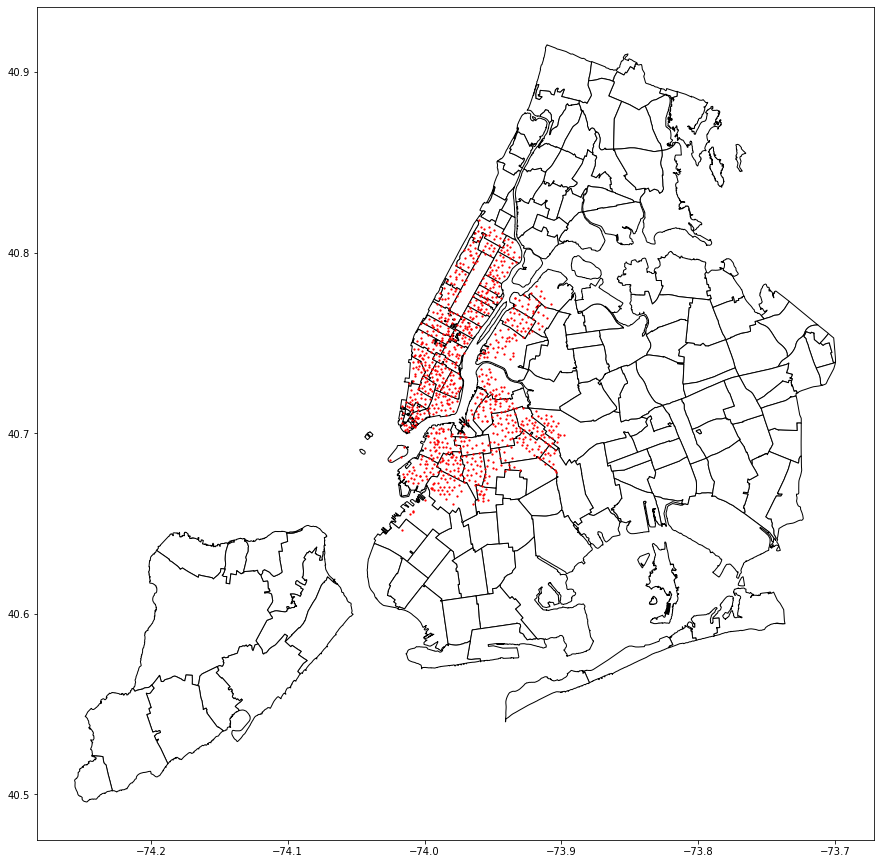

In [13]:
#Plots all of our stations onto a map of NYC
stationsPlot = stationsList
stationsPlot = stationsPlot.drop(index=607)
stationsPlot = stationsPlot.drop(index=752)

ax = zipcodes.plot(color = 'white', edgecolor = 'black', figsize = (15, 30))
stationsPlot.plot(ax = ax, color = 'red', markersize = 1.5)


In [20]:
#Now we determine the zip code of each station (this is computationally quite intensive)
stationZip = [0] * len(stationsList)
for i in range(len(stationsList)):
    foundZip = False
    while foundZip == False:
        #There are a few problem stations that we will just hardcode to 0 and drop later
        if(i == 87):
            stationZip[87] = 10043
            foundZip = True
        if(i == 607):
            stationZip[607] = 0
            foundZip = True
        if(i == 752):
            stationZip[752] = 0
            foundZip = True
        for j in range(len(zipcodes)):
            if (stationsList.loc[i]['geometry'].within(zipcodes.loc[j]['geometry'])):
                print("We are on Station", i, "Station ID", stationsList.loc[i]['start station id'], "is in", zipcodes.loc[j]['ZIPCODE'])
                stationZip[i] = zipcodes.loc[j]['ZIPCODE']
                foundZip = True


We are on Station 0 Station ID 72.0 is in 10019
We are on Station 1 Station ID 79.0 is in 10013
We are on Station 2 Station ID 82.0 is in 10038
We are on Station 3 Station ID 83.0 is in 11217
We are on Station 4 Station ID 119.0 is in 11205
We are on Station 5 Station ID 120.0 is in 11238
We are on Station 6 Station ID 127.0 is in 10014
We are on Station 7 Station ID 128.0 is in 10014
We are on Station 8 Station ID 143.0 is in 11201
We are on Station 9 Station ID 144.0 is in 11201
We are on Station 10 Station ID 146.0 is in 10013
We are on Station 11 Station ID 150.0 is in 10009
We are on Station 12 Station ID 151.0 is in 10012
We are on Station 13 Station ID 152.0 is in 10007
We are on Station 14 Station ID 157.0 is in 11201
We are on Station 15 Station ID 161.0 is in 10012
We are on Station 16 Station ID 164.0 is in 10017
We are on Station 17 Station ID 167.0 is in 10016
We are on Station 18 Station ID 168.0 is in 10011
We are on Station 19 Station ID 173.0 is in 10019
We are on Stat

In [21]:
#Now we add those zipcodes to our dataframe
stationsList['zipcode'] = stationZip
stationsList = stationsList.rename(columns={'start station id': 'station id', 'start station latitude': 'station latitude', 'start station longitude': 'station longitude', 'start station name': 'station name'})

#Creates a two dfs of just stations numbers and their associated zip codes
startStationZips = stationsList.drop(columns = ['station latitude', 'station longitude', 'station name', 'geometry'])
startStationZips = startStationZips.rename(columns={'station id': 'start station id', 'zipcode': 'startzipcode'})
endStationZips = stationsList.drop(columns = ['station latitude', 'station longitude', 'station name', 'geometry'])
endStationZips = endStationZips.rename(columns={'station id': 'end station id', 'zipcode': 'endzipcode'})




In [22]:
startStationZips.head(10)

,start station id,startzipcode
0,72.0,10019
1,79.0,10013
2,82.0,10038
3,83.0,11217
4,119.0,11205
5,120.0,11238
6,127.0,10014
7,128.0,10014
8,143.0,11201
9,144.0,11201


In [25]:
#How many zip codes have stations?
numZips = len(stationsList.zipcode.unique())
print("There are", numZips, "unique zip codes that contain at least one Citi Bike station in 2018 and 2019")

#This is a pretty good number, granular enough to draw conclusions about demand while not being overwhelmingly large


There are 65 unique zip codes that contain at least one Citi Bike station in 2018 and 2019


In [26]:
#Now we tack on zip codes to each indidual trip taken in the entire dataset

mergedGDF = pd.merge(gdf, startStationZips, how = 'left')
mergedGDF = pd.merge(mergedGDF, endStationZips, how = 'left')


In [27]:
mergedGDF.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,geometry,startzipcode,endzipcode
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,W 52 St & 11 Ave,40.767272,-73.993929,505.0,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,POINT (-73.99393 40.76727),10019,10001
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3255.0,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,POINT (-73.99393 40.76727),10019,10001
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,W 52 St & 11 Ave,40.767272,-73.993929,525.0,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,POINT (-73.99393 40.76727),10019,10001
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,W 52 St & 11 Ave,40.767272,-73.993929,447.0,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,POINT (-73.99393 40.76727),10019,10019
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,POINT (-73.99393 40.76727),10019,10023


In [28]:
#Now we just take the data we need - the date of each trip and its start and end zipcode
#Ignore the warning
tripDF = mergedGDF[['starttime', 'startzipcode', 'endzipcode']]
tripDF['starttime'] = pd.to_datetime(tripDF['starttime']).dt.date
tripDF = tripDF.rename(columns={'starttime': 'date'})
tripDF.head()

C:\Users\brian\AppData\Local\Temp/ipykernel_14532/2972678725.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tripDF['starttime'] = pd.to_datetime(tripDF['starttime']).dt.date


,date,startzipcode,endzipcode
0,2018-01-01,10019,10001
1,2018-01-01,10019,10001
2,2018-01-01,10019,10001
3,2018-01-01,10019,10019
4,2018-01-01,10019,10023


In [29]:
#Let's see the most common values - it looks like intra-zipcode travel happens a lot
#00083 is the zipcode for Central Park - makes sense that it sees the heaviest usage
tripDF.value_counts()

date        startzipcode  endzipcode
2018-09-02  00083         00083         1971
2019-09-21  11201         11201         1768
2018-08-05  00083         00083         1636
2019-09-21  00083         00083         1583
2018-04-14  00083         00083         1565
                                        ... 
2019-04-28  10011         11221            1
2018-05-04  10007         10022            1
2019-04-28  10011         11237            1
                          11251            1
2018-01-01  10043         10004            1
Length: 1343964, dtype: int64

In [276]:
#Create a separate dataframes for start and end zipcodes
startDF = tripDF.drop(columns="endzipcode")
endDF = tripDF.drop(columns="startzipcode")

startFreqs = startDF.value_counts(sort=False)
endFreqs = endDF.value_counts(sort=False)

#Convert the above to dataframes
startFreqs = startFreqs.to_frame()
endFreqs = endFreqs.to_frame()

#Create a table of trips originating and ending from each zip code per date, fill in any NaNs with the next day's number
#This is just a horrible block of code, I'm sorry if you ever want to reuse it :(
startFreqs = startFreqs.reset_index().pivot('date', 'startzipcode')
startFreqs.fillna(method='backfill', inplace=True)
startFreqs.columns = startFreqs.columns.droplevel(0)
startFreqs = startFreqs.reset_index()
startFreqs.columns.name = None
startFreqs['date'] = pd.to_datetime(startFreqs['date'])
startFreqs = startFreqs.drop(startFreqs.columns[1], axis=1)

endFreqs = endFreqs.reset_index().pivot('date', 'endzipcode')
endFreqs.fillna(method='backfill', inplace=True)
endFreqs.columns = endFreqs.columns.droplevel(0)
endFreqs = endFreqs.reset_index()
endFreqs.columns.name = None
endFreqs['date'] = pd.to_datetime(endFreqs['date'])
endFreqs = endFreqs.drop(endFreqs.columns[1], axis=1)

In [277]:
daterange = pd.date_range('2018-01-01', periods=730, freq='D')
daterange2018 = pd.date_range('2018-01-01', periods=365, freq='D')
daterange2019 = pd.date_range('2019-01-01', periods=365, freq='D')


In [278]:
weather = pd.read_csv("noaafull2018.csv")
weather["date"] = pd.to_datetime(weather["date"])
weather.head()


,date,prec,snow,snow_depth,temp_max,temp_min
0,2018-01-01,0.00,0.0,0.0,19,7
1,2018-01-02,0.00,0.0,0.0,26,13
2,2018-01-03,0.00,0.0,0.0,30,16
3,2018-01-04,0.76,9.8,1.2,29,19
4,2018-01-05,0.00,0.0,7.1,19,9


In [279]:
import datetime as dt
pd.options.mode.chained_assignment = None #Supresses the warning for the bad thing we're about to do

dateInfoDF = pd.DataFrame({'date': daterange})
dateInfoDF["is_weekend"] = dateInfoDF['date'].dt.dayofweek > 4
dateInfoDF["is_holiday"] = False

#Hardcoding public holidays by hand

dateInfoDF.loc[dateInfoDF['date'] == '2018-01-01', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-01-15', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-02-12', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-02-19', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-05-28', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-07-04', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-09-03', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-10-08', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-11-12', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-11-22', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-12-24', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-12-25', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-12-31', 'is_holiday'] = True #NYE isn't a true holiday, but probably has similar usage patterns to one
dateInfoDF.loc[dateInfoDF['date'] == '2019-01-01', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-01-21', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-02-12', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-02-18', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-05-27', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-07-04', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-09-02', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-10-14', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-11-11', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-11-28', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-12-24', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-12-25', 'is_holiday'] = True
dateInfoDF.loc[dateInfoDF['date'] == '2018-12-31', 'is_holiday'] = True #NYE isn't a true holiday, but probably has similar usage patterns to one

dateInfoDF


,date,is_weekend,is_holiday
0,2018-01-01,False,True
1,2018-01-02,False,False
2,2018-01-03,False,False
3,2018-01-04,False,False
4,2018-01-05,False,False
...,...,...,...
725,2019-12-27,False,False
726,2019-12-28,True,False
727,2019-12-29,True,False
728,2019-12-30,False,False


In [280]:
features = weather
features = pd.merge(features, dateInfoDF)

startFreqs = startFreqs.dropna(axis=1)
startFreqs = startFreqs.drop(columns=['11207', '11237', '11385'])
startFreqs = startFreqs.reset_index()

df_start = pd.merge(features, startFreqs)

In [281]:
df_start

,date,prec,snow,snow_depth,temp_max,temp_min,is_weekend,is_holiday,index,10043,...,11217,11221,11222,11225,11231,11232,11233,11238,11249,11251
0,2018-01-01,0.00,0.0,0.0,19,7,False,True,0,4.0,...,119.0,15.0,90.0,7.0,67.0,1.0,4.0,120.0,77.0,6.0
1,2018-01-02,0.00,0.0,0.0,26,13,False,False,1,38.0,...,324.0,38.0,236.0,14.0,202.0,7.0,5.0,209.0,214.0,22.0
2,2018-01-03,0.00,0.0,0.0,30,16,False,False,2,51.0,...,392.0,43.0,335.0,28.0,267.0,14.0,8.0,305.0,257.0,33.0
3,2018-01-04,0.76,9.8,1.2,29,19,False,False,3,5.0,...,34.0,5.0,35.0,3.0,27.0,8.0,1.0,21.0,24.0,3.0
4,2018-01-05,0.00,0.0,7.1,19,9,False,False,4,8.0,...,79.0,12.0,88.0,2.0,55.0,8.0,1.0,57.0,70.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,0.00,0.0,0.0,54,46,False,False,725,77.0,...,473.0,133.0,451.0,57.0,299.0,10.0,34.0,466.0,346.0,44.0
726,2019-12-28,0.00,0.0,0.0,51,43,True,False,726,70.0,...,429.0,140.0,528.0,65.0,364.0,15.0,21.0,503.0,480.0,41.0
727,2019-12-29,0.25,0.0,0.0,44,39,True,False,727,23.0,...,313.0,120.0,354.0,43.0,198.0,6.0,12.0,332.0,267.0,23.0
728,2019-12-30,0.74,0.0,0.0,41,37,False,False,728,14.0,...,210.0,41.0,207.0,24.0,136.0,1.0,10.0,182.0,141.0,16.0


In [282]:
indices_2018 = [*range(0,365)]
indices_2019 = [*range(365, 730)]

In [299]:
from sklearn import linear_model, metrics, model_selection

X_train = features.drop(features.index[indices_2019])
X_train = X_train.drop('date', axis=1)

y_train = startFreqs.drop(startFreqs.index[indices_2019])
y_train = y_train.drop('date', axis=1)
y_train = y_train.drop('index', axis=1)

X_test = features.drop(features.index[indices_2018])
X_test = X_test.drop('date', axis=1)

y_test = startFreqs.drop(startFreqs.index[indices_2018])
y_test = y_test.reset_index()
y_test = y_test.drop('date', axis=1)
y_test = y_test.drop('index', axis=1)
y_test = y_test.drop('level_0', axis=1)


In [294]:
#Linear Models
linModel = linear_model.LinearRegression()
ridgeModel = linear_model.Ridge(alpha = 1)
lassoModel = linear_model.Lasso(alpha =  2)

In [283]:
linModel.fit(X_train, y_train)

LinearRegression()

In [295]:
from sklearn import model_selection

linModelResults = model_selection.cross_validate(linModel, X_train, y_train, scoring = ['neg_root_mean_squared_error'])
linRMSE = sum(linModelResults['test_neg_root_mean_squared_error'])/len(linModelResults['test_neg_root_mean_squared_error'])

ridgeModelResults = model_selection.cross_validate(ridgeModel, X_train, y_train, scoring = ['neg_root_mean_squared_error'])
ridgeRMSE = sum(ridgeModelResults['test_neg_root_mean_squared_error'])/len(ridgeModelResults['test_neg_root_mean_squared_error'])

lassoModelResults = model_selection.cross_validate(lassoModel, X_train, y_train, scoring = ['neg_root_mean_squared_error'])
lassoRMSE = sum(lassoModelResults['test_neg_root_mean_squared_error'])/len(lassoModelResults['test_neg_root_mean_squared_error'])


print("The linear regression's RMSE is", linRMSE)
print("The ridge regression's RMSE is", ridgeRMSE)
print("The lasso regression's RMSE is", lassoRMSE)


The linear regression's RMSE is -191.6573332918456
The ridge regression's RMSE is -191.54250122749994
The lasso regression's RMSE is -191.9973367721164


In [285]:
#Support Vector Multioutput
from sklearn import svm, multioutput

svr = svm.SVR(epsilon = 20, C = 10)
mor = multioutput.MultiOutputRegressor(svr)

svmResults = model_selection.cross_validate(mor, X_train, y_train, scoring = ['neg_root_mean_squared_error'])
svmRMSE = sum(svmResults['test_neg_root_mean_squared_error'])/len(svmResults['test_neg_root_mean_squared_error'])

print("The support vector regressor's RMSE is", svmRMSE)

The support vector regressor's RMSE is -292.54143951980825


In [253]:
ridgeFinalModel = linear_model.Lasso()
ridgeFinalModel.fit(X_train, y_train)

Lasso()

In [300]:
y_pred = ridgeFinalModel.predict(X_test)
predictionDF = pd.DataFrame(y_pred)
predictionDF.columns = y_test.columns
predictionDF.insert(loc=0, column='date', value=daterange2019)
predictionDF

,date,10043,00083,10001,10002,10003,10004,10005,10007,10009,...,11217,11221,11222,11225,11231,11232,11233,11238,11249,11251
0,2019-01-01,121.679849,1337.457341,1981.346336,1579.335934,2568.976812,385.406957,353.086143,628.635667,1416.237791,...,645.529973,76.763227,600.667640,62.373864,520.890322,26.117103,22.418564,533.494903,566.809593,75.349095
1,2019-01-02,68.440915,604.069766,2435.147778,1580.810055,2887.407557,213.928247,358.809609,629.928103,1596.813669,...,638.760612,63.919351,547.277956,40.551299,444.961387,14.080263,14.735185,468.058681,435.358630,53.013273
2,2019-01-03,81.817311,753.701191,2539.287370,1676.864640,3023.548318,257.687874,383.612718,678.873212,1662.776643,...,677.052966,68.420883,593.534554,46.783290,483.270712,16.825584,16.811970,509.857503,485.821834,58.272319
3,2019-01-04,90.662256,878.528068,2556.517237,1694.385944,3040.095518,282.705034,391.286554,697.153724,1647.666853,...,679.734546,67.434768,603.939511,48.151167,498.639721,18.817031,17.295674,524.047082,504.551884,62.073785
4,2019-01-05,45.413818,892.015285,957.359549,1514.583592,2017.083095,163.661367,122.863723,353.684302,1322.281111,...,575.701677,65.069511,539.297432,74.497121,434.177208,14.599062,18.069695,574.056583,535.040081,35.912945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,116.615273,1113.375975,2869.207579,1979.309258,3461.681218,376.004152,458.110202,822.296921,1901.492099,...,802.541208,84.660156,736.933185,66.141689,594.316008,23.766081,23.231226,633.965455,633.828245,71.583157
361,2019-12-28,81.780709,1354.359454,1451.896435,1912.793685,2632.704485,297.804222,216.419186,534.457408,1626.618354,...,731.775816,79.414466,700.824226,93.215559,571.996735,19.182835,21.213402,717.806437,704.110827,50.554149
362,2019-12-29,46.707147,937.948560,1065.757099,1585.831887,2142.495214,174.918610,137.076354,380.256852,1382.770013,...,602.153634,65.991893,558.770439,75.594048,453.291317,13.449648,16.892156,591.231621,553.765399,36.639336
363,2019-12-30,38.267946,173.261344,1909.483891,1180.999108,2248.479290,94.444931,267.940544,454.956796,1288.188501,...,485.175667,52.346009,398.651142,25.046263,312.990614,12.074633,14.135572,334.974945,280.628420,40.503649


In [301]:
y_plot = y_test
y_plot.insert(loc = 0, column = 'date', value = daterange2019)


In [302]:
y_plot 

,date,10043,00083,10001,10002,10003,10004,10005,10007,10009,...,11217,11221,11222,11225,11231,11232,11233,11238,11249,11251
0,2019-01-01,45.0,1201.0,812.0,1072.0,1242.0,126.0,155.0,361.0,1013.0,...,391.0,54.0,350.0,74.0,340.0,5.0,11.0,493.0,305.0,36.0
1,2019-01-02,60.0,1057.0,2273.0,1609.0,2539.0,296.0,376.0,639.0,1426.0,...,647.0,60.0,528.0,57.0,501.0,21.0,7.0,573.0,451.0,68.0
2,2019-01-03,89.0,975.0,2577.0,1763.0,2781.0,310.0,415.0,641.0,1661.0,...,716.0,73.0,625.0,57.0,516.0,21.0,14.0,619.0,523.0,59.0
3,2019-01-04,73.0,1091.0,2643.0,1942.0,2934.0,292.0,423.0,724.0,1853.0,...,718.0,73.0,652.0,66.0,574.0,18.0,21.0,703.0,568.0,59.0
4,2019-01-05,5.0,294.0,702.0,1025.0,1384.0,50.0,105.0,191.0,941.0,...,403.0,49.0,332.0,54.0,293.0,2.0,20.0,462.0,301.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,77.0,1024.0,1847.0,1632.0,2045.0,199.0,291.0,463.0,1494.0,...,473.0,133.0,451.0,57.0,299.0,10.0,34.0,466.0,346.0,44.0
361,2019-12-28,70.0,1301.0,1270.0,1598.0,1940.0,166.0,159.0,337.0,1361.0,...,429.0,140.0,528.0,65.0,364.0,15.0,21.0,503.0,480.0,41.0
362,2019-12-29,23.0,769.0,746.0,1053.0,1154.0,77.0,115.0,218.0,1036.0,...,313.0,120.0,354.0,43.0,198.0,6.0,12.0,332.0,267.0,23.0
363,2019-12-30,14.0,168.0,750.0,650.0,902.0,72.0,103.0,172.0,699.0,...,210.0,41.0,207.0,24.0,136.0,1.0,10.0,182.0,141.0,16.0


In [317]:
pred_scaled = predictionDF.drop(columns = ['date'])
pred_scaled = pred_scaled.multiply(1.203)
pred_scaled.insert(loc=0, column='date', value=daterange2019)


In [318]:
sample_y = y_plot[['date', '10019']]
sample_y = sample_y.rename(columns = {'10019': 'Actual Usage'})
sample_pred = pred_scaled[['date', '10019']]
sample_pred = sample_pred.rename(columns={'10019': 'Predicted Usage'})

plot1 = sample_y.merge(sample_pred)
plot1

,date,Actual Usage,Predicted Usage
0,2019-01-01,854.0,2327.929403
1,2019-01-02,1857.0,2353.530030
2,2019-01-03,2053.0,2523.733068
3,2019-01-04,2173.0,2604.598974
4,2019-01-05,591.0,1244.064938
...,...,...,...
360,2019-12-27,1640.0,3002.710804
361,2019-12-28,1354.0,1918.249719
362,2019-12-29,736.0,1361.719763
363,2019-12-30,429.0,1670.239114


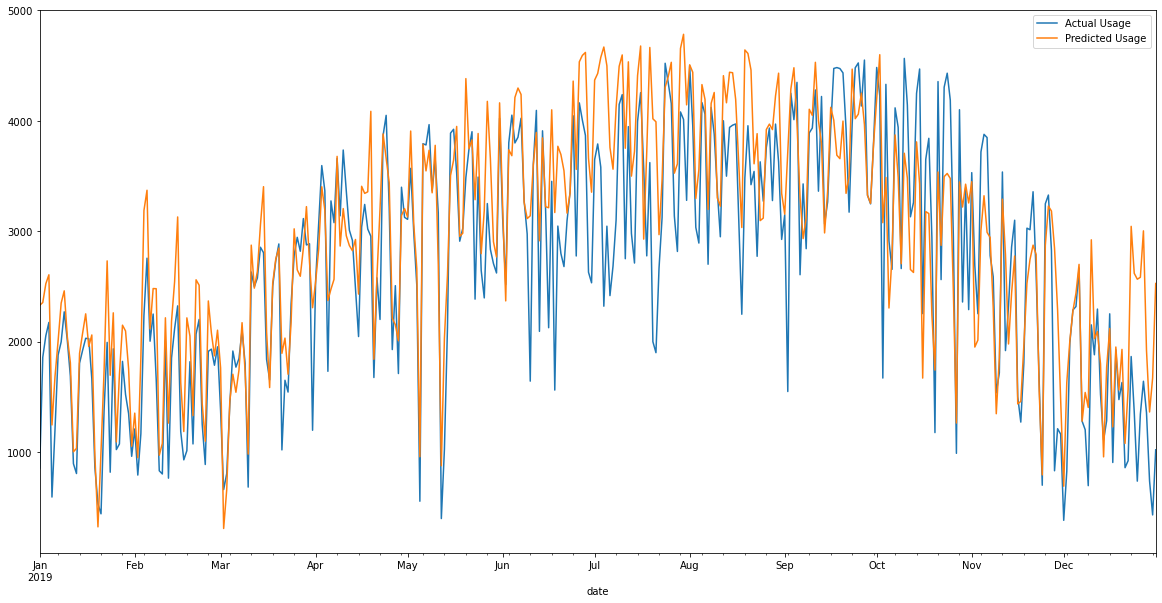

In [305]:
ax = plot1.plot.line(x='date', y = ['Actual Usage', 'Predicted Usage'], figsize=(20, 10))


In [331]:
#Now let's do the same thing, but for all stations in aggregate
pred_scaled_sum = predictionDF.drop(columns=['date'])
pred_scaled_sum['sum'] = pred_scaled_sum.sum(axis=1, numeric_only=True)
pred_scaled_sum.insert(loc=0, column='date', value=daterange2019)
pred_scaled_sum


,date,10043,00083,10001,10002,10003,10004,10005,10007,10009,...,11221,11222,11225,11231,11232,11233,11238,11249,11251,sum
0,2019-01-01,121.679849,1337.457341,1981.346336,1579.335934,2568.976812,385.406957,353.086143,628.635667,1416.237791,...,76.763227,600.667640,62.373864,520.890322,26.117103,22.418564,533.494903,566.809593,75.349095,39032.387159
1,2019-01-02,68.440915,604.069766,2435.147778,1580.810055,2887.407557,213.928247,358.809609,629.928103,1596.813669,...,63.919351,547.277956,40.551299,444.961387,14.080263,14.735185,468.058681,435.358630,53.013273,38486.336171
2,2019-01-03,81.817311,753.701191,2539.287370,1676.864640,3023.548318,257.687874,383.612718,678.873212,1662.776643,...,68.420883,593.534554,46.783290,483.270712,16.825584,16.811970,509.857503,485.821834,58.272319,41129.191948
3,2019-01-04,90.662256,878.528068,2556.517237,1694.385944,3040.095518,282.705034,391.286554,697.153724,1647.666853,...,67.434768,603.939511,48.151167,498.639721,18.817031,17.295674,524.047082,504.551884,62.073785,42030.686903
4,2019-01-05,45.413818,892.015285,957.359549,1514.583592,2017.083095,163.661367,122.863723,353.684302,1322.281111,...,65.069511,539.297432,74.497121,434.177208,14.599062,18.069695,574.056583,535.040081,35.912945,26857.546940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,116.615273,1113.375975,2869.207579,1979.309258,3461.681218,376.004152,458.110202,822.296921,1901.492099,...,84.660156,736.933185,66.141689,594.316008,23.766081,23.231226,633.965455,633.828245,71.583157,48971.356391
361,2019-12-28,81.780709,1354.359454,1451.896435,1912.793685,2632.704485,297.804222,216.419186,534.457408,1626.618354,...,79.414466,700.824226,93.215559,571.996735,19.182835,21.213402,717.806437,704.110827,50.554149,37149.424610
362,2019-12-29,46.707147,937.948560,1065.757099,1585.831887,2142.495214,174.918610,137.076354,380.256852,1382.770013,...,65.991893,558.770439,75.594048,453.291317,13.449648,16.892156,591.231621,553.765399,36.639336,28545.537929
363,2019-12-30,38.267946,173.261344,1909.483891,1180.999108,2248.479290,94.444931,267.940544,454.956796,1288.188501,...,52.346009,398.651142,25.046263,312.990614,12.074633,14.135572,334.974945,280.628420,40.503649,28289.632089


In [334]:
y_test_sum = y_test
y_test_sum = y_test.drop(columns=['date'])
y_test_sum['sum'] = y_test_sum.sum(axis=1, numeric_only=True)
y_test_sum.insert(loc=0, column='date', value=daterange2019)
y_test_sum


,date,10043,00083,10001,10002,10003,10004,10005,10007,10009,...,11221,11222,11225,11231,11232,11233,11238,11249,11251,sum
0,2019-01-01,45.0,1201.0,812.0,1072.0,1242.0,126.0,155.0,361.0,1013.0,...,54.0,350.0,74.0,340.0,5.0,11.0,493.0,305.0,36.0,21962.0
1,2019-01-02,60.0,1057.0,2273.0,1609.0,2539.0,296.0,376.0,639.0,1426.0,...,60.0,528.0,57.0,501.0,21.0,7.0,573.0,451.0,68.0,37797.0
2,2019-01-03,89.0,975.0,2577.0,1763.0,2781.0,310.0,415.0,641.0,1661.0,...,73.0,625.0,57.0,516.0,21.0,14.0,619.0,523.0,59.0,41676.0
3,2019-01-04,73.0,1091.0,2643.0,1942.0,2934.0,292.0,423.0,724.0,1853.0,...,73.0,652.0,66.0,574.0,18.0,21.0,703.0,568.0,59.0,43922.0
4,2019-01-05,5.0,294.0,702.0,1025.0,1384.0,50.0,105.0,191.0,941.0,...,49.0,332.0,54.0,293.0,2.0,20.0,462.0,301.0,21.0,17432.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,77.0,1024.0,1847.0,1632.0,2045.0,199.0,291.0,463.0,1494.0,...,133.0,451.0,57.0,299.0,10.0,34.0,466.0,346.0,44.0,31625.0
361,2019-12-28,70.0,1301.0,1270.0,1598.0,1940.0,166.0,159.0,337.0,1361.0,...,140.0,528.0,65.0,364.0,15.0,21.0,503.0,480.0,41.0,28306.0
362,2019-12-29,23.0,769.0,746.0,1053.0,1154.0,77.0,115.0,218.0,1036.0,...,120.0,354.0,43.0,198.0,6.0,12.0,332.0,267.0,23.0,17844.0
363,2019-12-30,14.0,168.0,750.0,650.0,902.0,72.0,103.0,172.0,699.0,...,41.0,207.0,24.0,136.0,1.0,10.0,182.0,141.0,16.0,12077.0


In [335]:
total_y = y_test_sum[['date', 'sum']]
total_y = total_y.rename(columns={'sum': 'Actual Usage'})
pred_scaled_sum = pred_scaled[['date', '10019']]
pred_scaled_sum = sample_pred.rename(columns={'sum': 'Predicted Usage'})

plot2 = sample_y.merge(sample_pred)
plot2


,date,Actual Usage,Predicted Usage
0,2019-01-01,854.0,2327.929403
1,2019-01-02,1857.0,2353.530030
2,2019-01-03,2053.0,2523.733068
3,2019-01-04,2173.0,2604.598974
4,2019-01-05,591.0,1244.064938
...,...,...,...
360,2019-12-27,1640.0,3002.710804
361,2019-12-28,1354.0,1918.249719
362,2019-12-29,736.0,1361.719763
363,2019-12-30,429.0,1670.239114


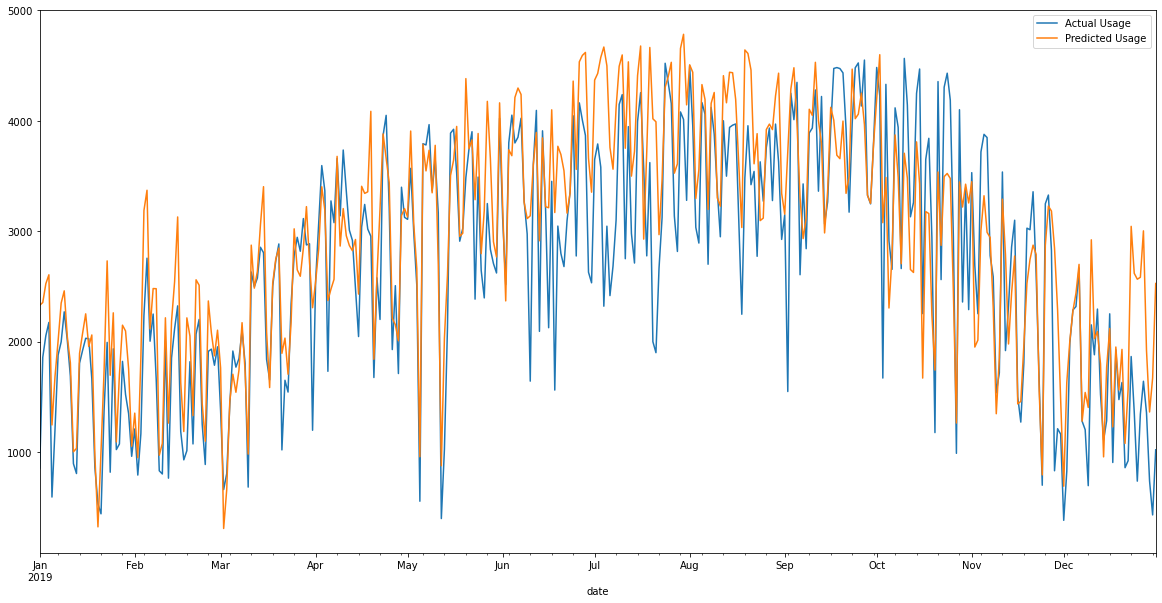

In [336]:
ax = plot2.plot.line(x='date', y = ['Actual Usage', 'Predicted Usage'], figsize=(20, 10))

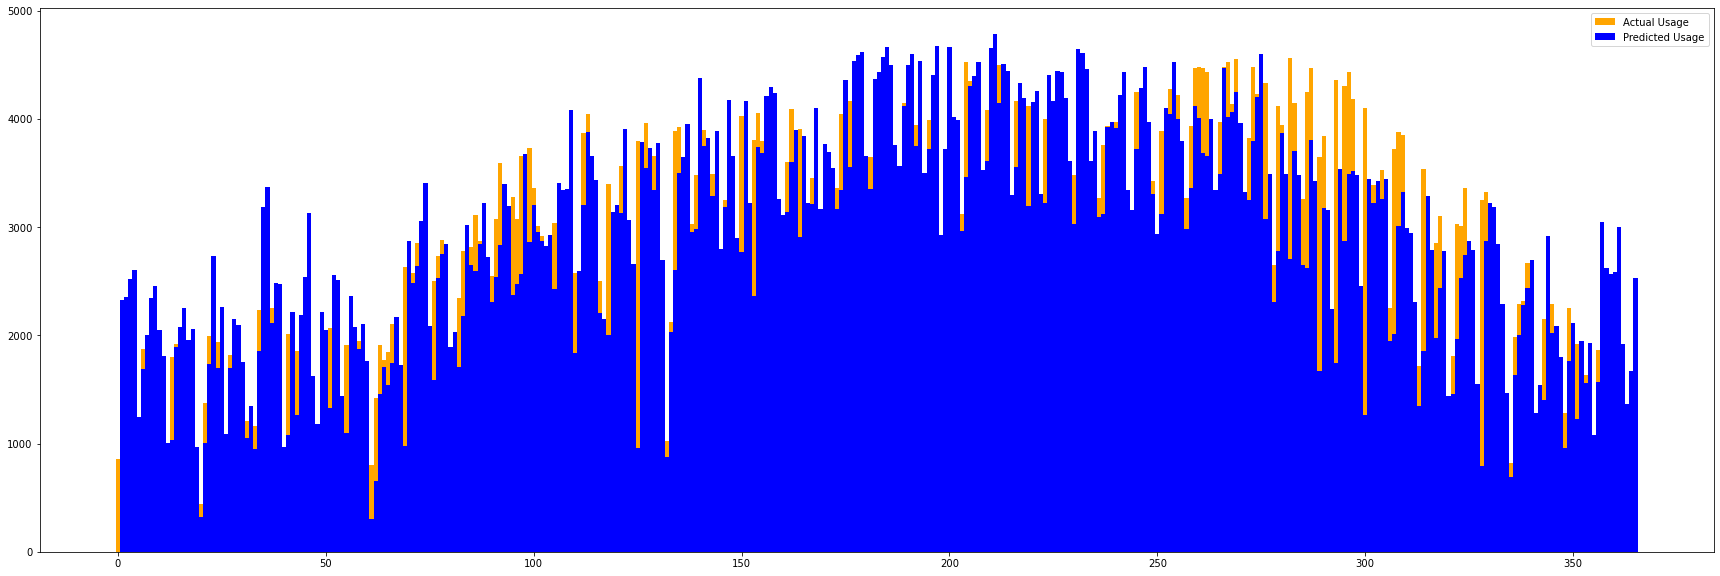

In [230]:
from matplotlib import pyplot

N = 365

ind = np.arange(N)  # the x locations for the groups
width = 1       # the width of the bars

fig, ax = plt.pyplot.subplots(figsize = (30,10))
rects1 = ax.bar(ind, y_plot['10019'], width, color='orange')
rects2 = ax.bar(ind + width, pred_scaled['10019'], width, color='blue')

ax.legend((rects1[0], rects2[0]), ('Actual Usage', 'Predicted Usage'))

#plt.pyplot.bar(y_plot['date'], y_plot['10019'], color = 'orange', linewidth = 0)
#plt.pyplot.bar(predictionDF['date'], predictionDF['10019'], color='blue', linewidth=0)


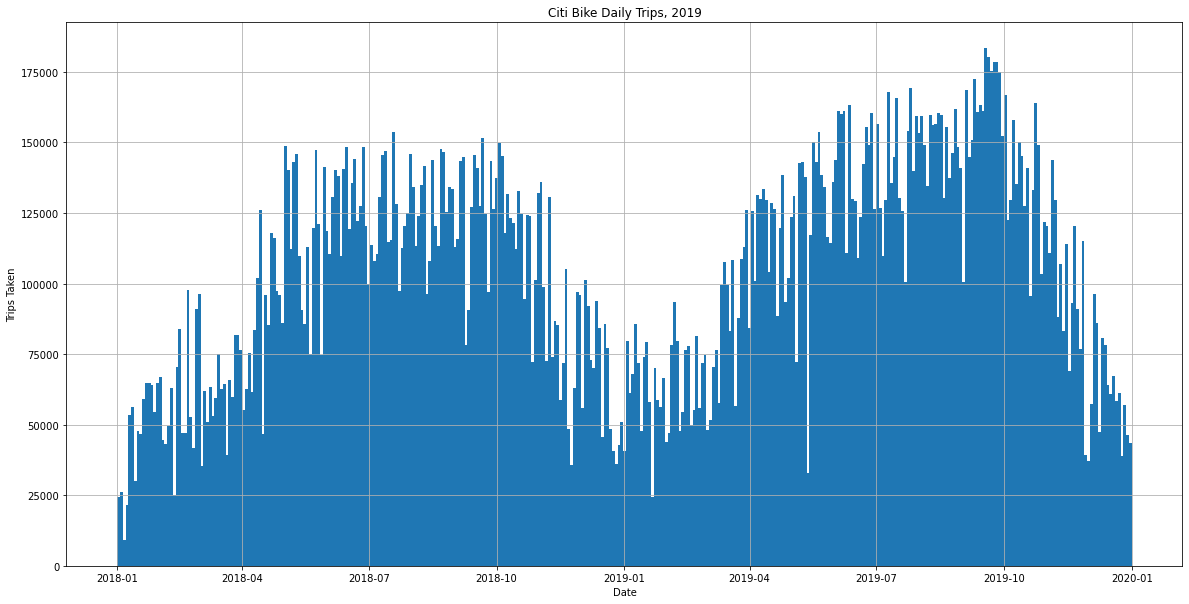

In [130]:
hist = cb.hist("starttime", figsize = (20,10), bins = 365)

for ax in hist.flatten():
    ax.set_xlabel("Date")
    ax.set_title("Citi Bike Daily Trips, 2019")
    ax.set_ylabel("Trips Taken")
